ProPixx measurements
====================

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pysilsub.jazcal import EasyJAZ
from pysilsub.device import StimulationDevice
plt.style.use('seaborn-notebook')

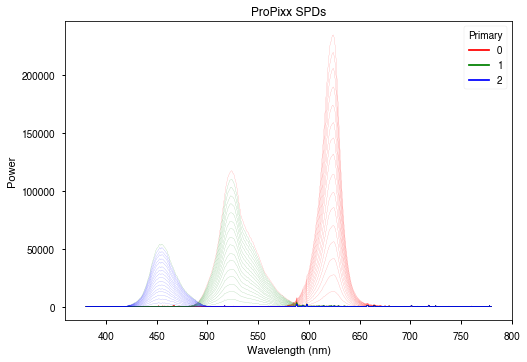

In [35]:
spectra = pd.read_csv('../../BakerWadeBBSRC/data/ProPixx/ProPixx_JAZ_spectra_in_bore.csv')
info = pd.read_csv('../../BakerWadeBBSRC/data/ProPixx/ProPixx_JAZ_spectra_info_in_bore.csv')

jaz = EasyJAZ()

vis = jaz.process_measurements(spectra, info)
vis[['Primary', 'Setting']] = info[['Primary', 'Setting']]
vis = vis.set_index(['Primary', 'Setting'])

sd = StimulationDevice(
    resolutions=[255]*3,
    wavelengths=[380, 780, 1],
    colors=['red', 'green', 'blue'],
    calibration=vis,
    name='ProPixx'
    )

sd.plot_calibration_spds();


Gershun vs. Fiber Optic
-----------------------

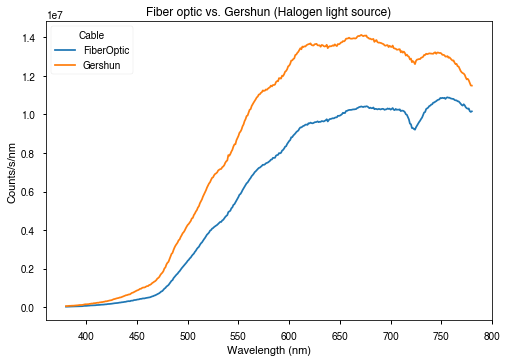

In [36]:
spectra = pd.read_csv('../../BakerWadeBBSRC/data/ProPixx/fo_gersun_halogen_jaz_spectra.csv')
info = pd.read_csv('../../BakerWadeBBSRC/data/ProPixx/fo_gersun_halogen_jaz_info.csv')
vis = jaz.process_measurements(spectra, info)
vis['Cable'] = info['Cable']
vis['Measurement'] = np.repeat(np.arange(6), 2)
vis = vis.set_index(['Cable', 'Measurement'])

f, ax = plt.subplots()
vis.groupby('Cable').mean().T.plot(ax=ax)
ax.set_title('Fiber optic vs. Gershun (Halogen light source)')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Counts/s/nm');

<AxesSubplot:>

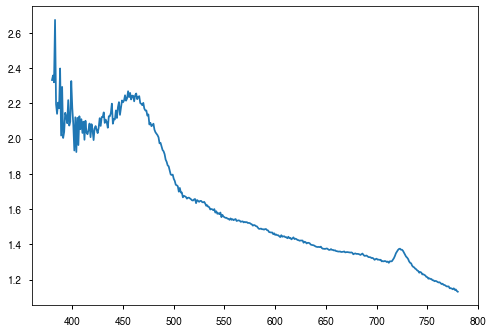

In [39]:
avs = vis.groupby('Cable').mean()
ratio = (avs.loc['Gershun'] / avs.loc['FiberOptic'])
ratio.plot()

## Correction for cable


<AxesSubplot:title={'center':'ProPixx SPDs'}, xlabel='Wavelength (nm)', ylabel='Power'>

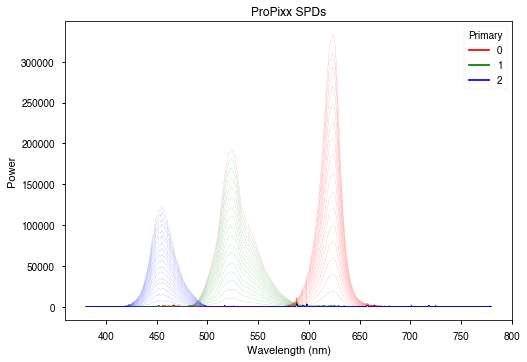

In [40]:
sd.calibration = sd.calibration*ratio
sd.plot_calibration_spds()

<AxesSubplot:>

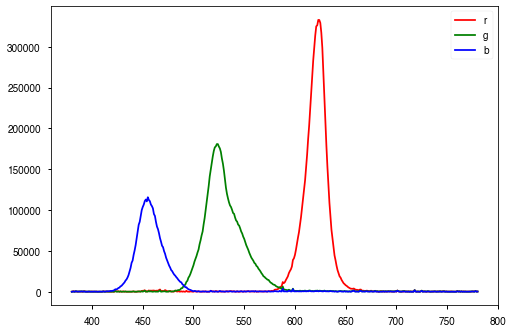

In [47]:
rgb = [(0,255),(1,255),(2,255)]
rgb_spds = sd.calibration.loc[rgb]
rgb_spds.index = ['r', 'g', 'b']
rgb_spds.T.plot(color=['r','g','b'])


In [58]:
from scipy.io import savemat
rgb_spds.to_dict()
savemat('ProPixxYNiC.mat', {name: col.values for name, col in rgb_spds.T.items()})

<AxesSubplot:title={'center':'ProPixx SPDs'}, xlabel='Wavelength (nm)', ylabel='Power'>

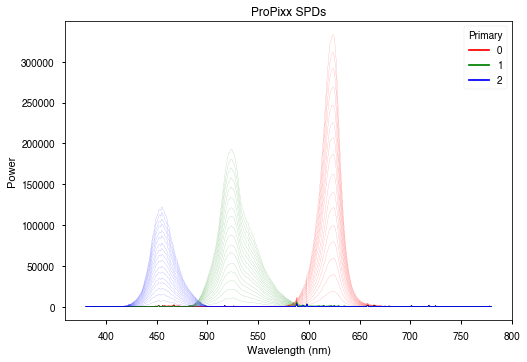

In [79]:
data = sd.calibration
sd.calibration = data.shift(-1)
sd.plot_calibration_spds()

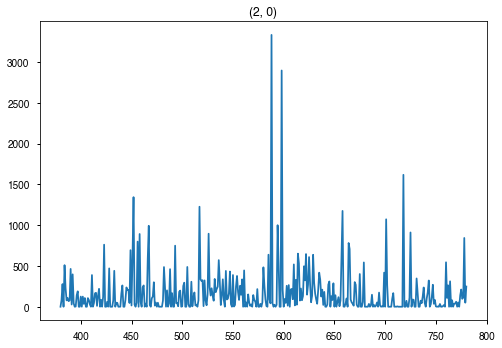

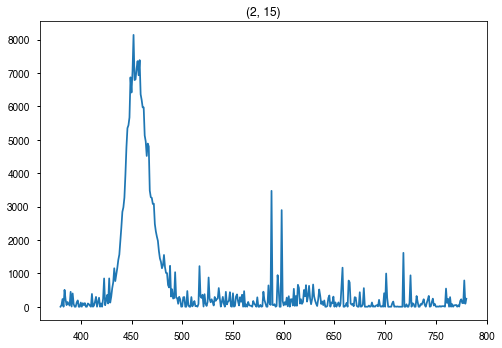

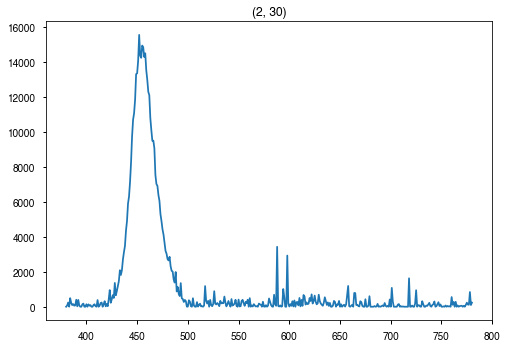

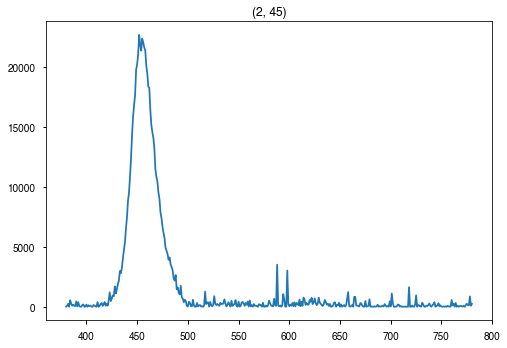

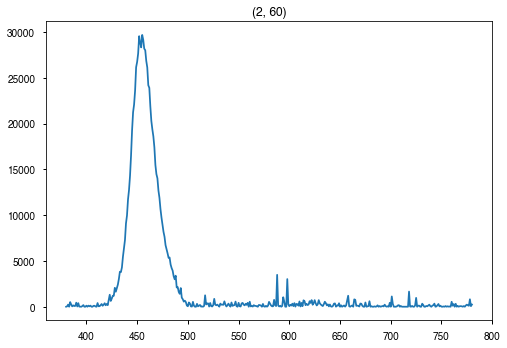

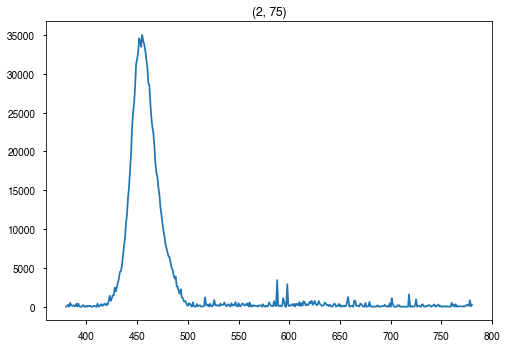

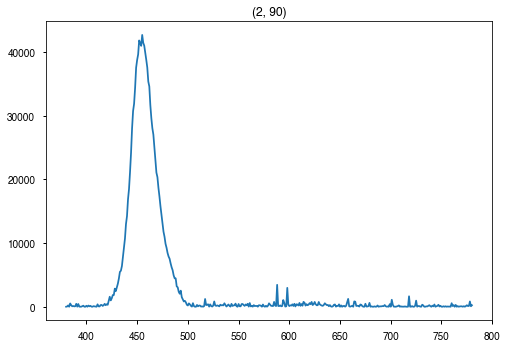

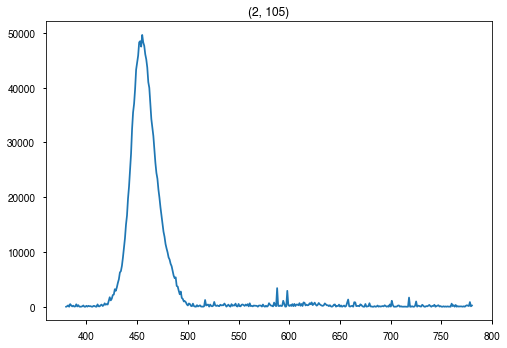

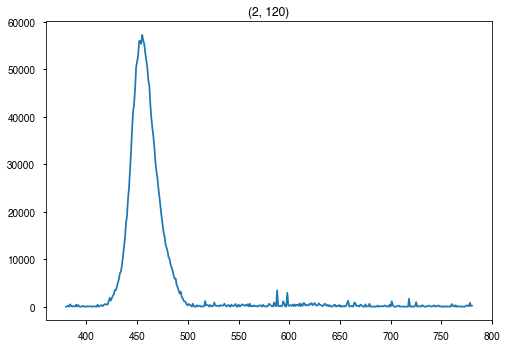

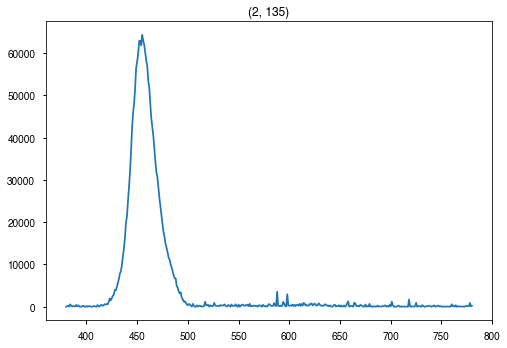

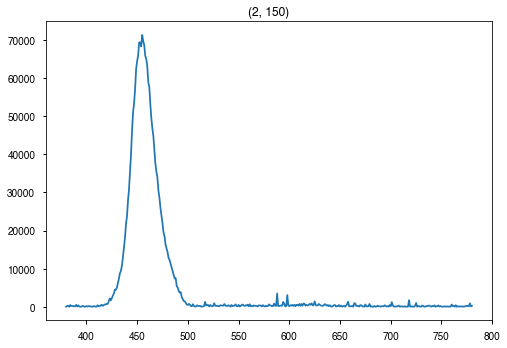

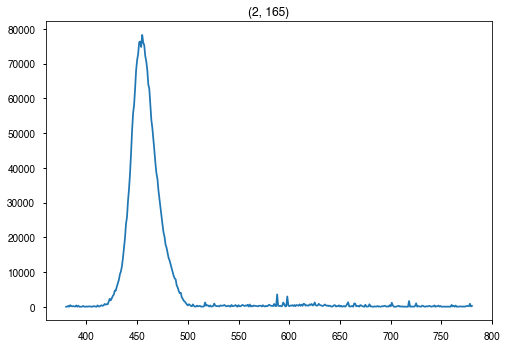

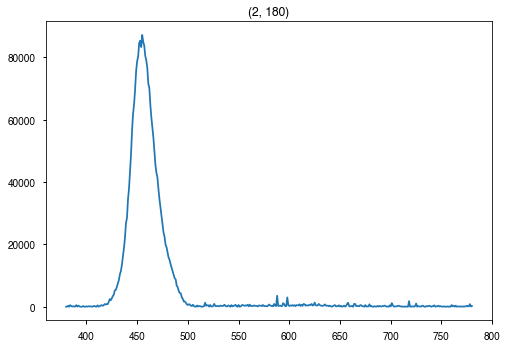

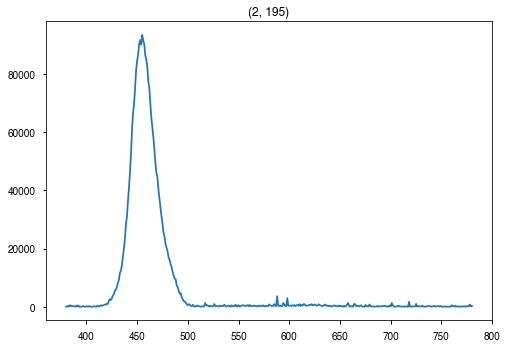

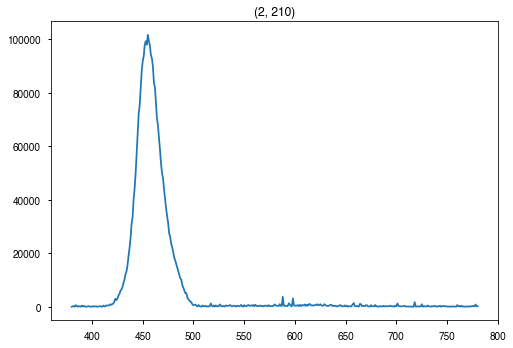

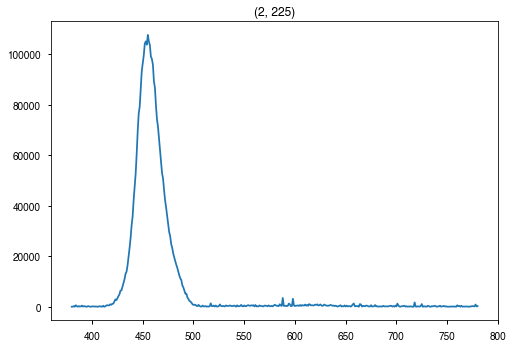

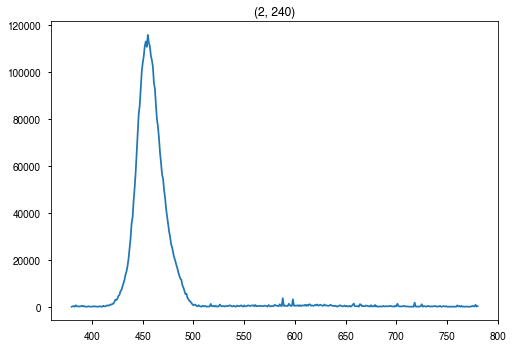

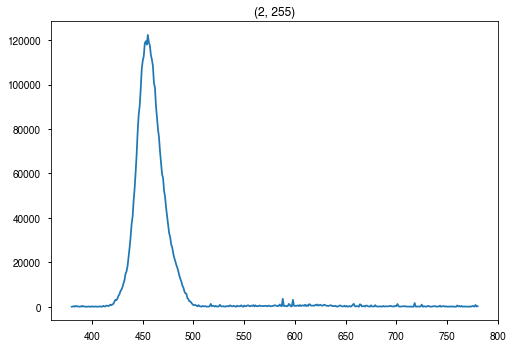

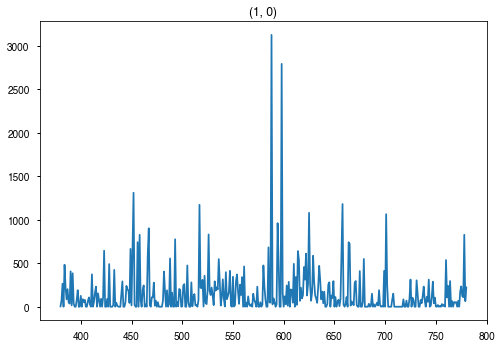

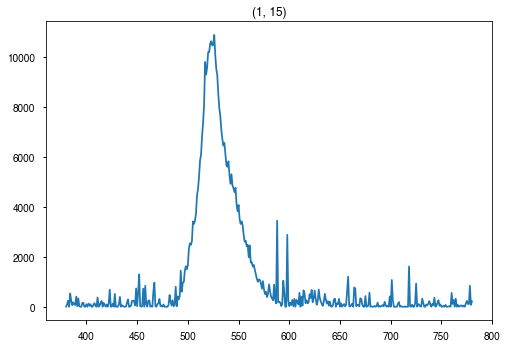

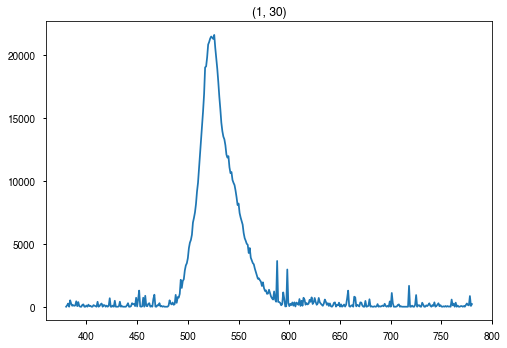

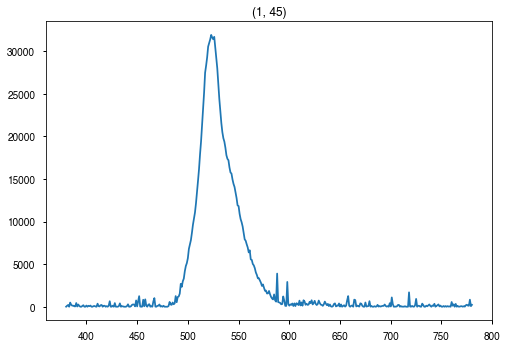

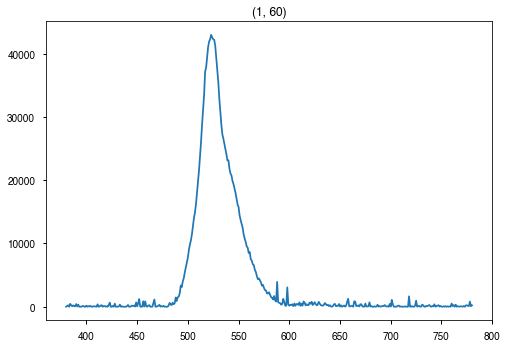

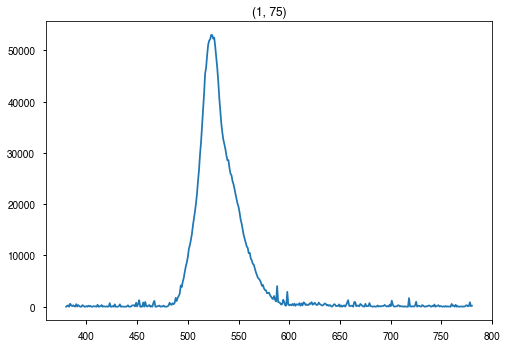

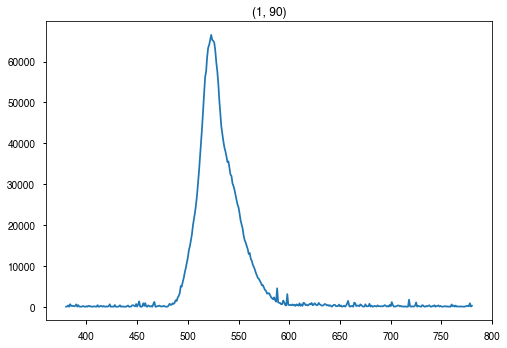

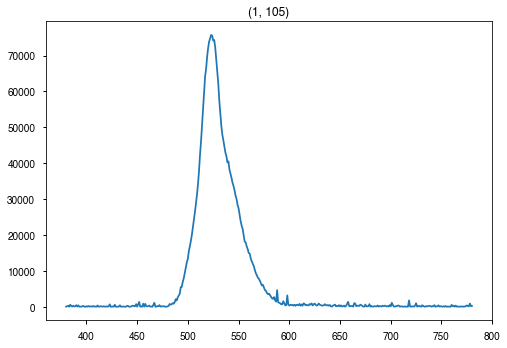

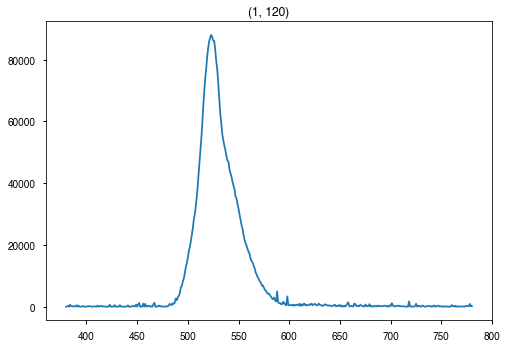

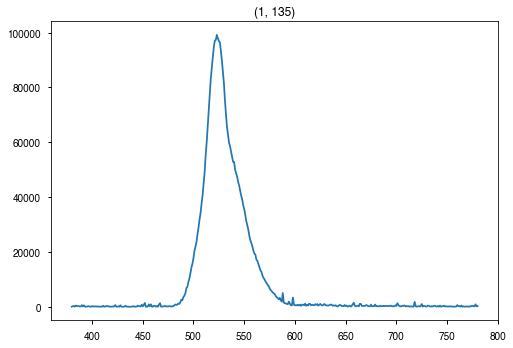

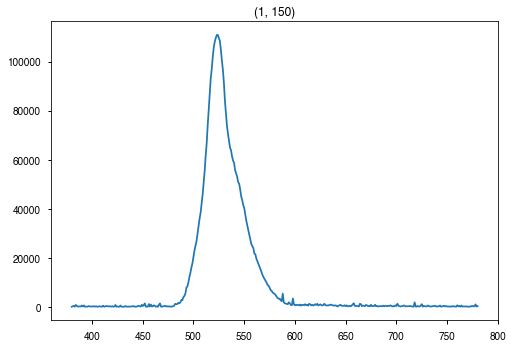

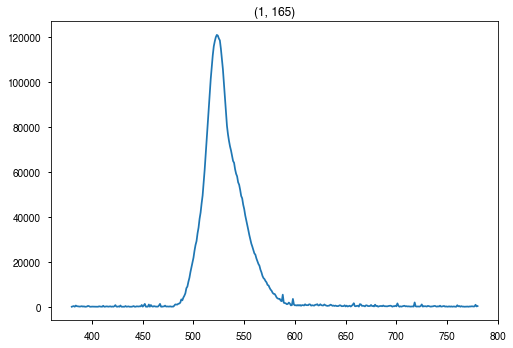

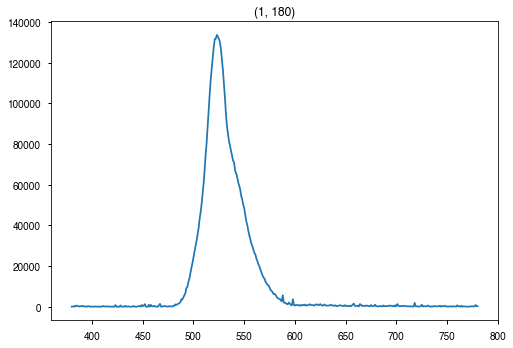

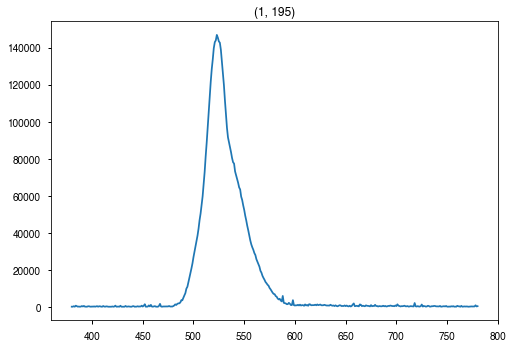

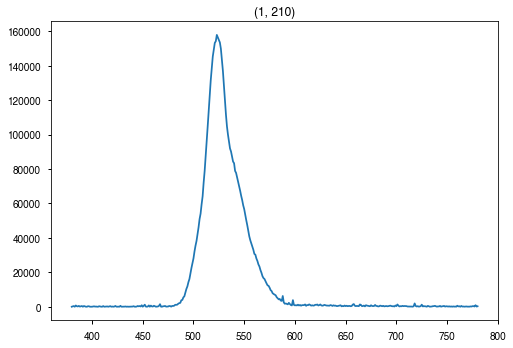

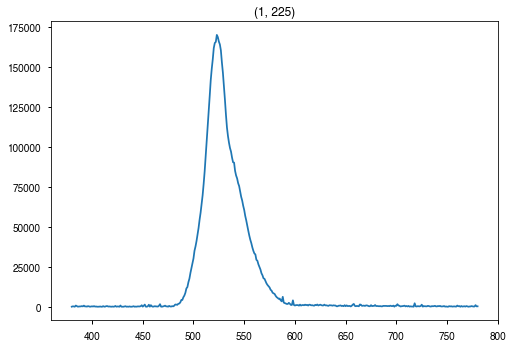

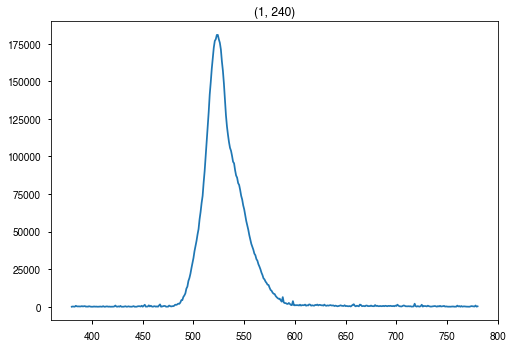

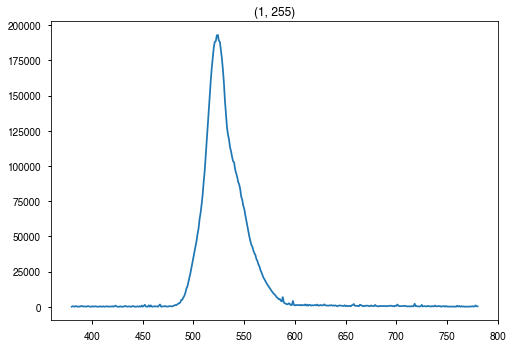

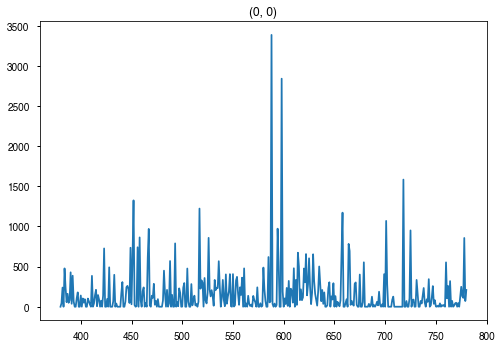

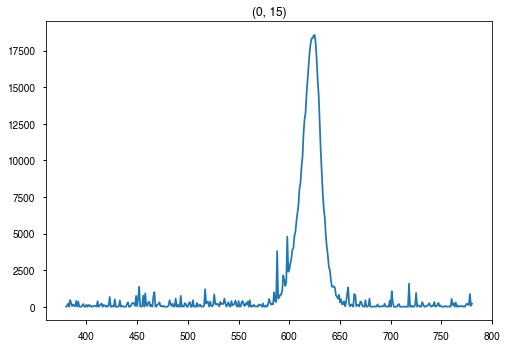

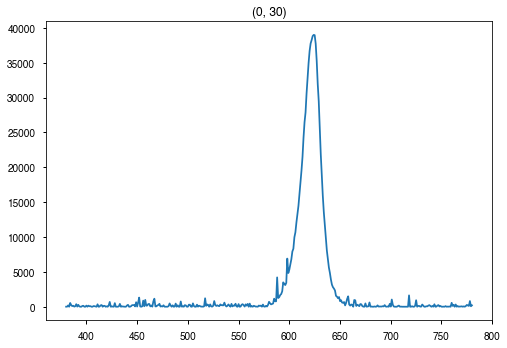

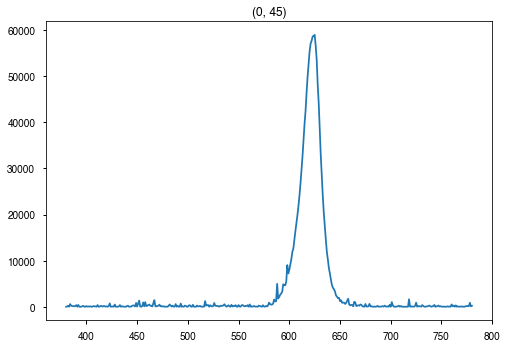

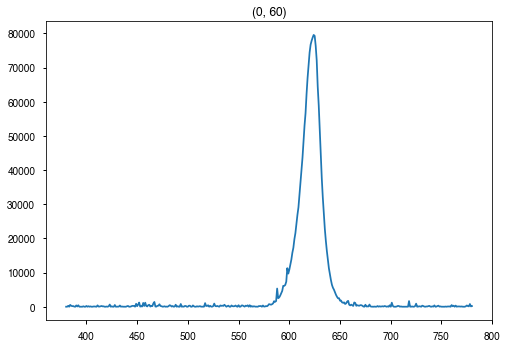

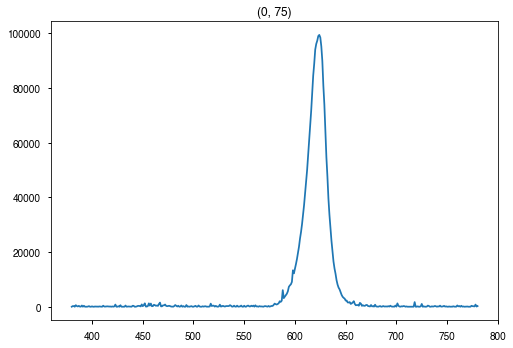

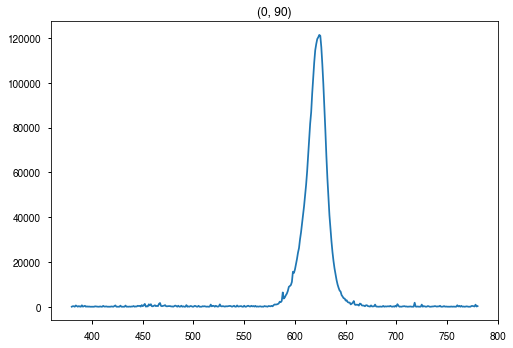

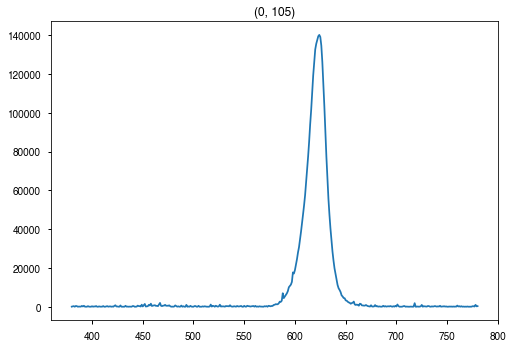

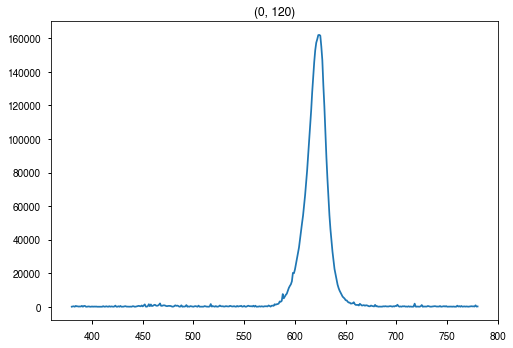

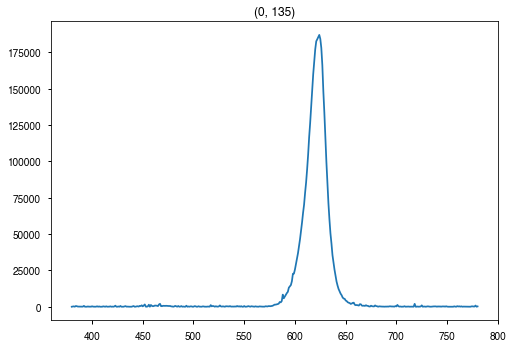

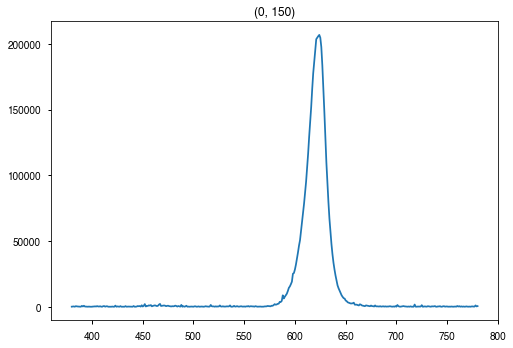

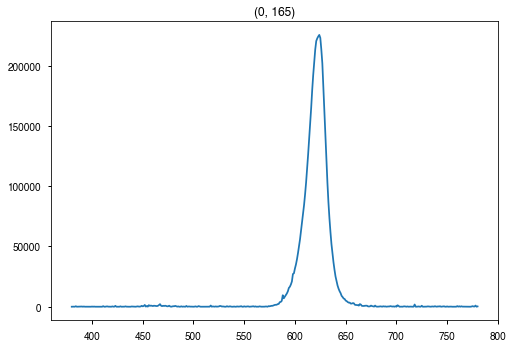

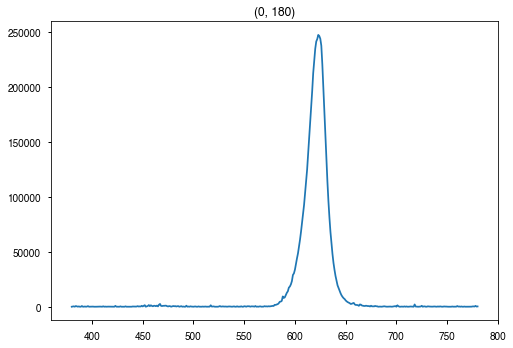

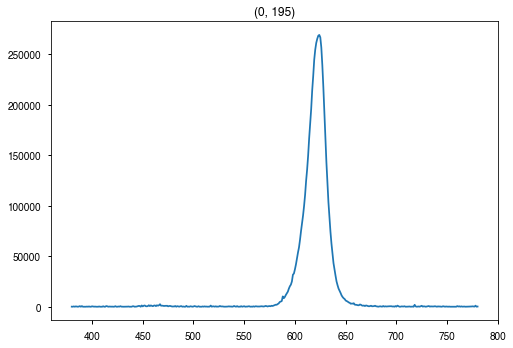

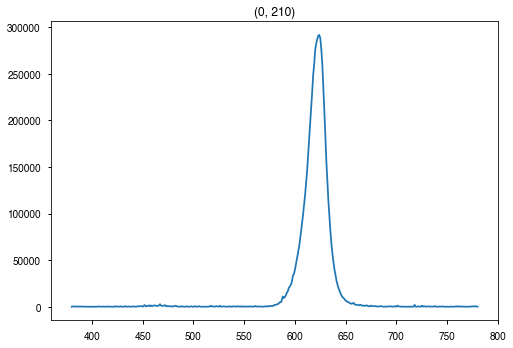

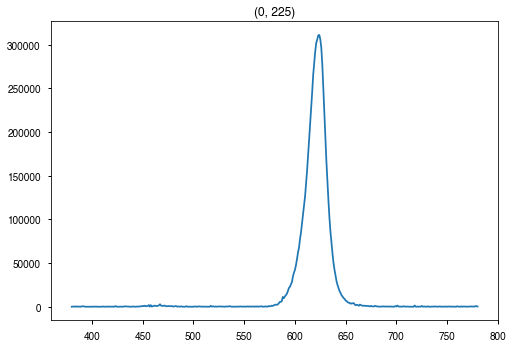

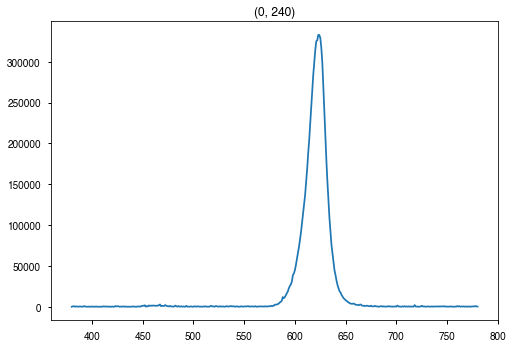

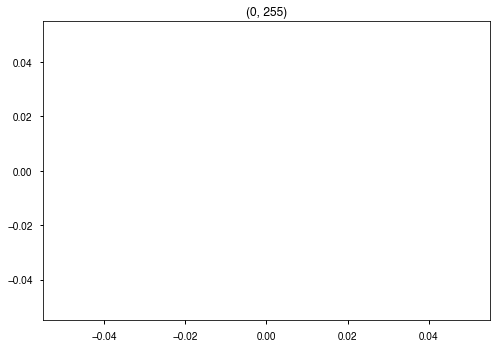

In [80]:
for idx, row in sd.calibration.iterrows():
    row.plot()
    plt.title(idx)
    plt.show()

<AxesSubplot:title={'center':'ProPixx SPDs'}, xlabel='Wavelength (nm)', ylabel='Power'>

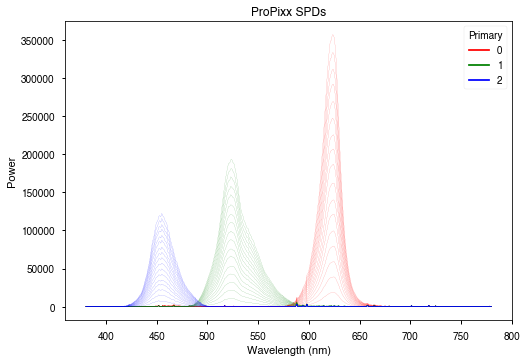

In [117]:
sd.calibration.loc[0, 255] = sd.calibration.loc[0, 240]
sd.calibration.loc[0, 255] *= (1+(1/255*18))
sd.plot_calibration_spds()

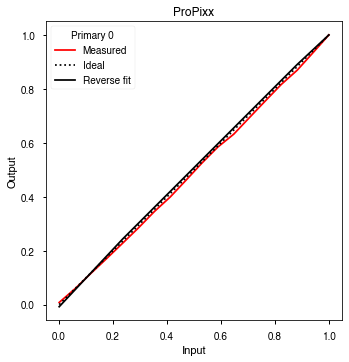

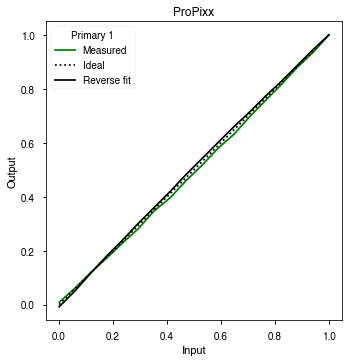

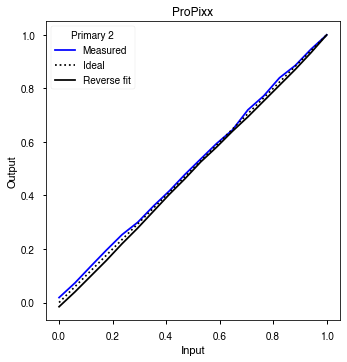

In [118]:
sd.do_gamma()
sd.plot_gamma()

In [119]:
sd.calibration.to_csv('../data/ProPixx.csv')